# Non-derivative contour fitting

Previous experiment have shown that countour fitting to image derivative can not be used for this problem. Here I try fitting contours to the original image instead of derivatives.

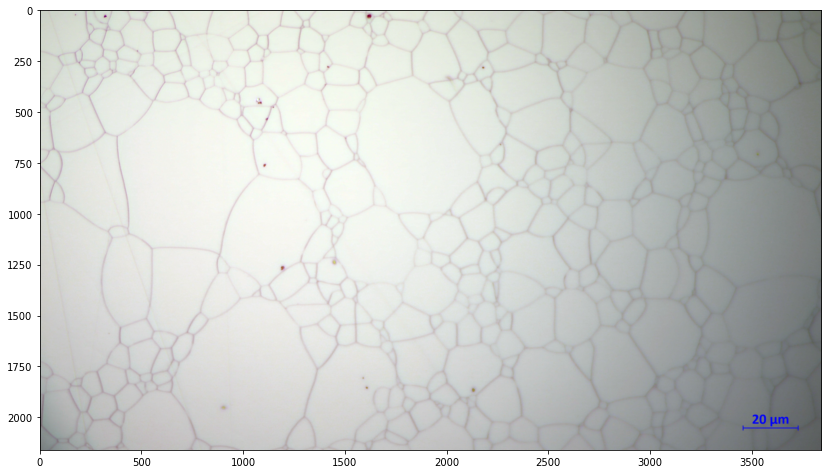

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 9]

img = cv2.imread('../example_data/Snap-05.jpg')
plt.imshow(img)
plt.show()

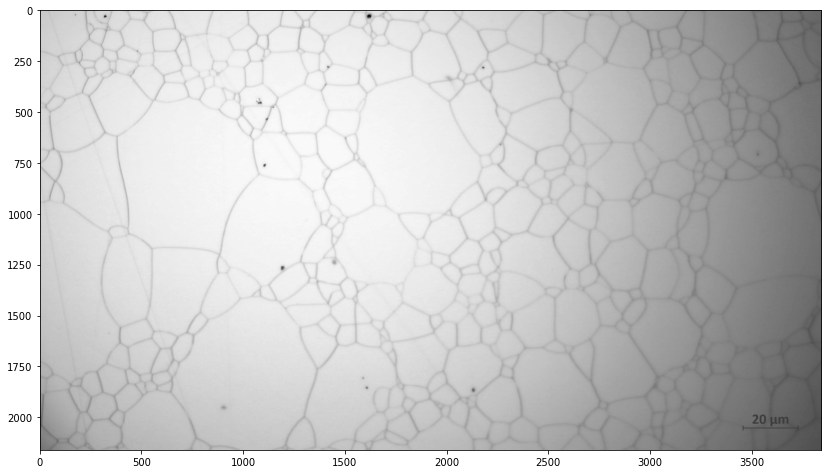

In [2]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

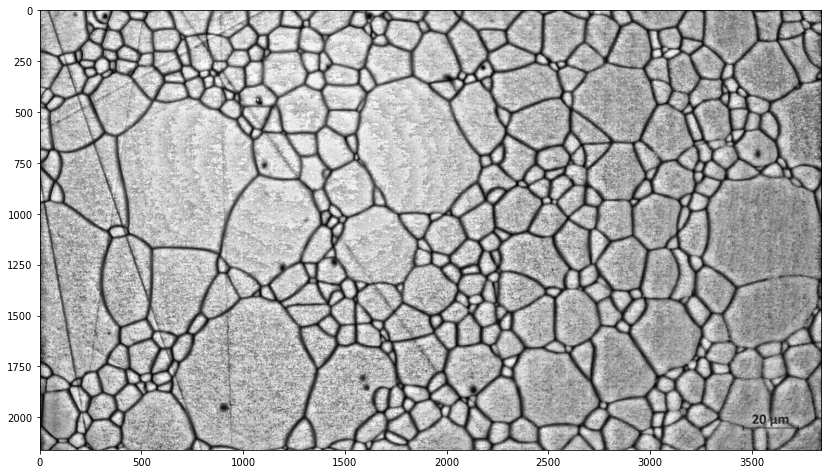

In [3]:
clahe = cv2.createCLAHE(clipLimit=30.0, tileGridSize=(64, 64))
img_cl = clahe.apply(img_gray)
plt.imshow(img_cl, cmap='gray')
plt.show()

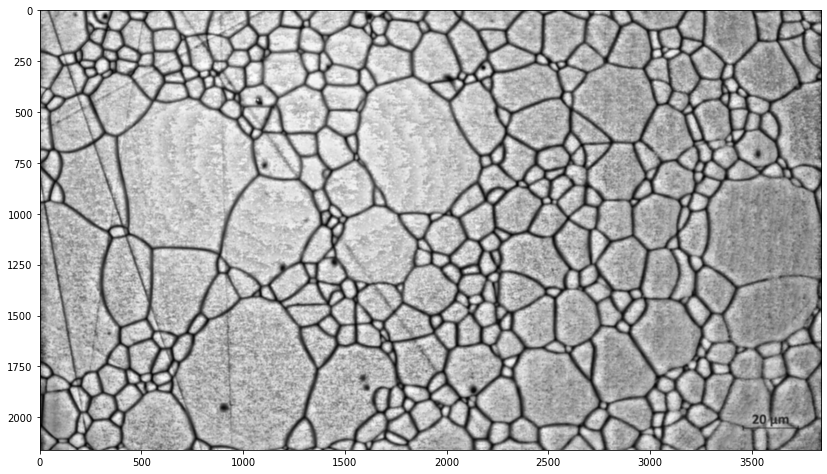

In [4]:
img_bl = cv2.blur(img_cl, (8, 8))
plt.imshow(img_bl, cmap='gray')
plt.show()

Here `cv2.THRESH_TRIANGLE` is doing much better image than `cv2.THRESH_OTSU`.

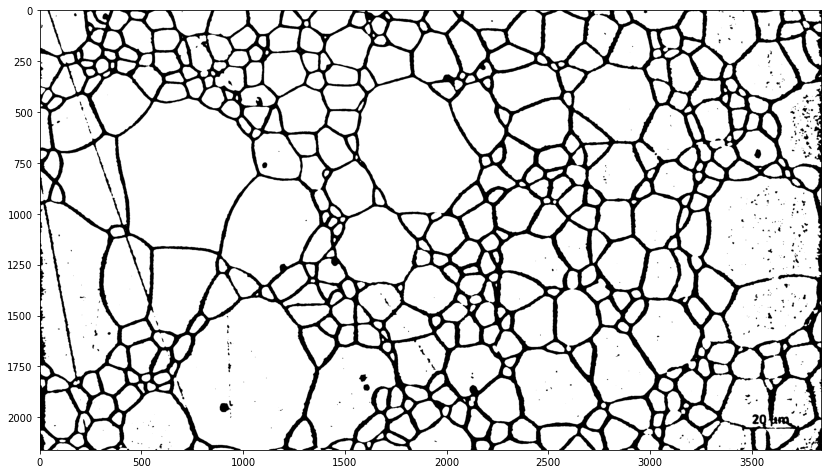

In [5]:
_, img_tr = cv2.threshold(img_bl, 0, 255, cv2.THRESH_TRIANGLE+cv2.THRESH_BINARY)
plt.imshow(img_tr, cmap='gray')
plt.show()

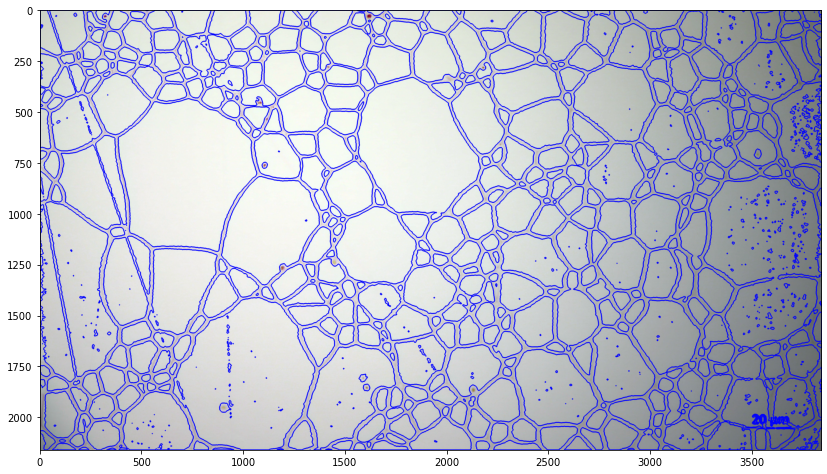

In [6]:
contours, hierarchy = cv2.findContours(img_tr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
img_contours = cv2.drawContours(img_contours, contours, -1, (0,0,255), 3)
plt.imshow(img_contours)
plt.show()

Remove noise by thresholding contour length:

In [72]:
long_contours = [c for c in contours if len(c) > 20]
len(long_contours)

521

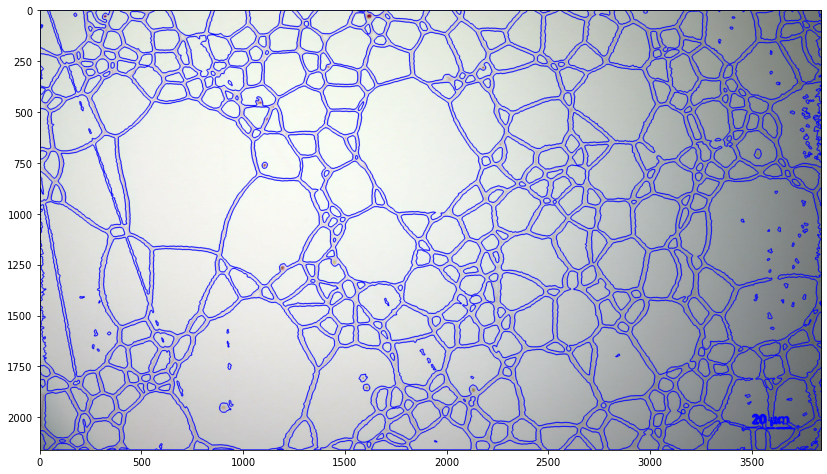

In [78]:
img_contours = img.copy()
img_contours = cv2.drawContours(img_contours, long_contours, -1, (0,0,255), 3)
plt.imshow(img_contours)
plt.show()